In [27]:
import pandas as pd
import numpy as np
#
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans, MeanShift, DBSCAN, AgglomerativeClustering
#
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('..\data\processed\processed_4models.csv',index_col=[0])

In [3]:
x_train, x_test = train_test_split(df, test_size= 0.2, random_state = 42)

In [4]:
print(x_train.shape, x_test.shape)

(17098, 16) (4275, 16)


In [5]:
kmean = KMeans(n_clusters=5)
model2 = MeanShift()
model3 = DBSCAN()
model4 = AgglomerativeClustering()

### COMPRESSION

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_transform = pca.fit_transform(df)
print(df.shape)
print(x_transform.shape)

(21373, 16)
(21373, 2)


In [26]:
kmeans = KMeans(n_clusters=6)
x_transform = pd.DataFrame(x_transform)
x_transform["Cluster"] = kmeans.fit_predict(x_transform)
x_transform["Cluster"] = x_transform["Cluster"].astype("category")

x_transform.head()

,0,1,Cluster
0,11.791359,-3.933635,2
1,-21.763088,1.236605,5
2,11.791359,-3.933635,2
3,-21.763088,1.236605,5
4,11.791359,-3.933635,2


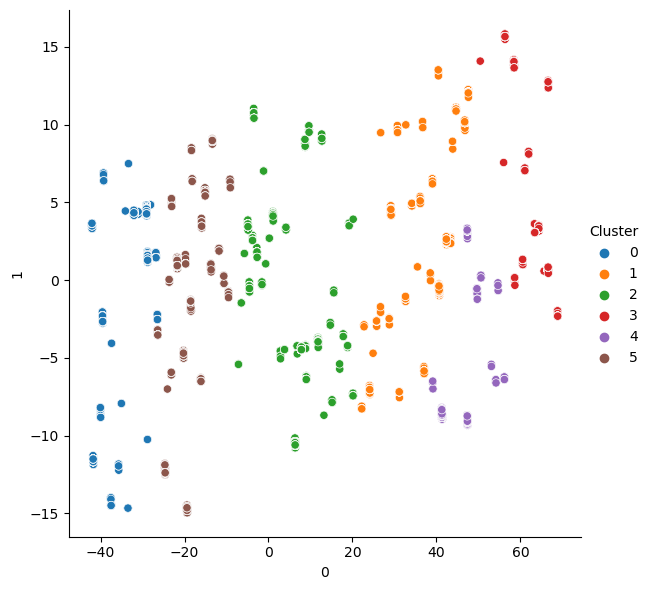

In [33]:
sns.relplot(
    x=0, y=1, hue="Cluster", data=x_transform, height=6,
)

In [67]:
x_transform['Cluster'].value_counts(sort=True)

5    7322
0    4728
2    3281
4    2416
1    2347
3    1279
Name: Cluster, dtype: int64

In [54]:
kmeans2 = KMeans(n_clusters=3)
del(df["Cluster"])
df["Cluster"] = kmeans.fit_predict(df)
df["Cluster"] = df["Cluster"].astype("category")

df.head(2)

,Código UG_x,Código Modalidade Compra_x,Código Órgão_x,Descrição,Quantidade Item,Código Vencedor,Código Órgão Superior,Município,Total,valor_individual,UF,mes_sin,mes_cos,dia_sin,dia_cos,ano,Cluster
0,0.840112,0.990566,0.451254,4,3.619910e-07,0.150527,0.744186,57,0.000030,0.000023,8,1.0,6.123234e-17,-0.998717,-0.050649,1.0,3
1,0.840112,0.990566,0.451254,4,3.619910e-07,0.150527,0.744186,90,0.000014,0.000023,16,0.5,-8.660254e-01,-0.724793,0.688967,1.0,1


In [66]:
df["Cluster"].value_counts(sort=True)

1    7391
5    4659
3    3281
2    2416
0    2347
4    1279
Name: Cluster, dtype: int64

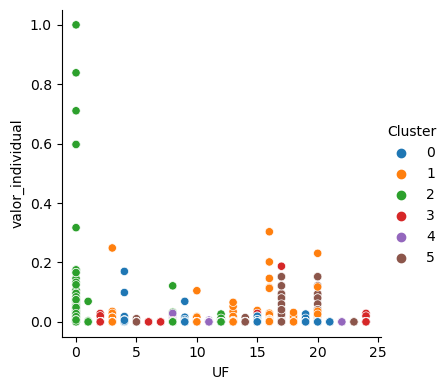

In [75]:
sns.relplot(
    x='UF', y='valor_individual', hue="Cluster", data=df, height=4,
)

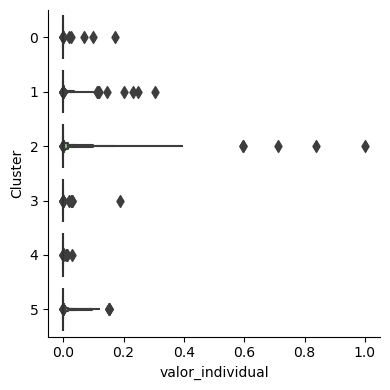

In [71]:
sns.catplot(x="valor_individual", y="Cluster", data=df, kind="boxen", height=4);

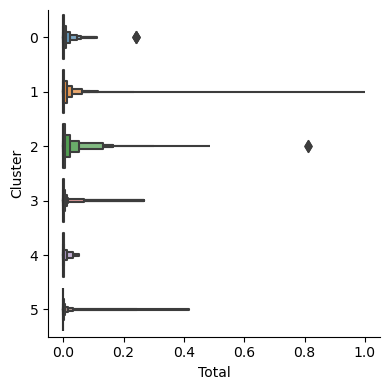

In [74]:
sns.catplot(x="Total", y="Cluster", data=df, kind="boxen", height=4);